# Hvordan hente data fra YR


[Introduksjon for utviklere fra Yr](https://developer.yr.no/)

[How To fra Yr](https://developer.yr.no/doc/locationforecast/HowTO/)

[Dokuemtasjon fra Met](https://api.met.no/weatherapi/documentation)

[Github med kode fra TØH](https://github.com/tom2802/vg2dela_python)

[Dokumentasjon og beskrivelse av requests modulen](https://requests.readthedocs.io/en/master/)

## Location Forecast
Dette API'er gir deg værmeldingen for de kommende dagene.<br>
[Using Locationforecast](https://developer.yr.no/doc/locationforecast/HowTO/)<br>
[Locationforecast (API)](https://api.met.no/weatherapi/locationforecast/2.0/documentation)<br>
[Datastruktur (JSON)](https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=60&lon=11) (Bruk denne lenken for å grave deg ned i dataene)<br>

In [ ]:
import requests
#59.17285329921516, 9.618022771697506 59.21253806279114, 9.589371014084042
url = 'https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=59.21253806279114&lon=9.589371014084042'

headers = {
    'User-Agent': 'Skogmo VG2DATa Agent 1.0',
    'sitename': 'tom.oyvind.hogstad@vtfk.no', # YR krever denne - bruk egen e-post adresse  
}

response = requests.get(url, headers=headers) # Henter en webside / data
json = response.json() # Denne funksjonen konverterer json reultate til en python dict

timeseries = json['properties']['timeseries'] # Tar ut bare timeseries nøkkelen, for å skrive litt mindre senere

for t in timeseries:
    print(t['time'], t['data']['instant']['details']['air_temperature'])
    #print(t) # Print t for å se da andre dataene du finner


In [ ]:
# Løsningsforslag 
import requests

# Importerer date modulen for oppgave 3
from datetime import date
today = str(date.today()) # Tar ut dagens dato og konverterer til en streng
#print(today)


coordinates = (70.61393279963836, 22.627836241344955) # Lager en variabel / tuple og kan lime rett inn fra Google maps
# Bruker f notasjonen på strenger og kan få coordinatene rett inn
url = f'https://api.met.no/weatherapi/locationforecast/2.0/compact?lat={coordinates[0]}&lon={coordinates[1]}'

headers = {'User-Agent': 'Skogmo VG2DATa Agent 1.0', 'sitename': 'tom.oyvind.hogstad@vtfk.no'}
response = requests.get(url, headers=headers) # Henter en webside / data
json = response.json() # Denne funksjonen konverterer json reultate til en python dict

for t in json['properties']['timeseries']:
    details = t['data']['instant']['details'] # Blir mer lesbart om jeg legger details i en variabel
    # Oppgave 3: Sjekker at today string ekisterer i time variablen og skriver bare ut om det er i dag.
    if today in t['time']: 
        # Ved å bruke end=' ', så får jeg ikke linjeskift og kan bruke en print() pr. verdi - blir lettere å lese
        print(t['time'], end=' ')
        print(details['air_pressure_at_sea_level'], end=' ')
        print(details['air_temperature'], end=' ')
        print(details['cloud_area_fraction'], end=' ')
        print(details['relative_humidity'], end=' ')
        print(details['wind_from_direction'], end=' ')
        print(details['wind_speed'], end=' ')
        
   
        # Oppgave 4, med regn neste time
        if 'next_1_hours' in t['data']: # Det er ikke alle timeseries som har nex1_1_hour
            print(t['data']['next_1_hours']['details']['precipitation_amount'], end=' ')
        else:
            print('0.0', end=' ')
        
 
        print('') # Tom streng med linjeskift
    

In [ ]:
s = 'Dette er en test'
if 'ikke' in s:
    print('Fant')
else:
    print('Fant ikke')



**Oppgaver:**<br> *1. Koden over viser lufttemperaturen på på koridnatet 60,11 (60 grader nord og 9 grader øst). 
Finn koordinatene der du er og bytt ut med dem i URL. Du kan finne koordinater ved i Google Maps.*<br>
*2. Skriv ut de andre dataene du kan hente fra hver timeseries i locationforecast*<br>
*3. Hent bare ut dagens data.*<br>
*4. I dataene så er det også precipitation_amount (regn) neste timen. Skriv ut disse dataene.*


## Nowcast

Dette api'et gir deg regnvarsel for de neste timene. <br>
https://api.met.no/weatherapi/nowcast/0.9/documentation

In [ ]:
import requests

#59.21672481296636, 9.598221739975772

url = 'https://api.met.no/weatherapi/nowcast/0.9/.json?lat=59.21672481296636&lon=9.598221739975772' # Åpne denne i Chrome for å se data

headers = {
    'User-Agent': 'Skogmo VG2DATa Agent 1.0',
    'sitename': 'tom.oyvind.hogstad@gmail.com', # YR krever denne - Bruk egen
}

response = requests.get(url, headers=headers)
json = response.json()
print(json)

In [ ]:
# Løsningsforslag 1, 2
import requests

url = 'https://api.met.no/weatherapi/nowcast/0.9/.json?lat=59.21672481296636&lon=9.598221739975772' # Åpne denne i Chrome for å se data

headers = {'User-Agent': 'Skogmo VG2DATa Agent 1.0', 'sitename': 'tom.oyvind.hogstad@gmail.com'}

response = requests.get(url, headers=headers)
json = response.json()
for t in json['product']['time']:
    print(t['to'], t['location']['precipitation']['value'], t['location']['altitude'])

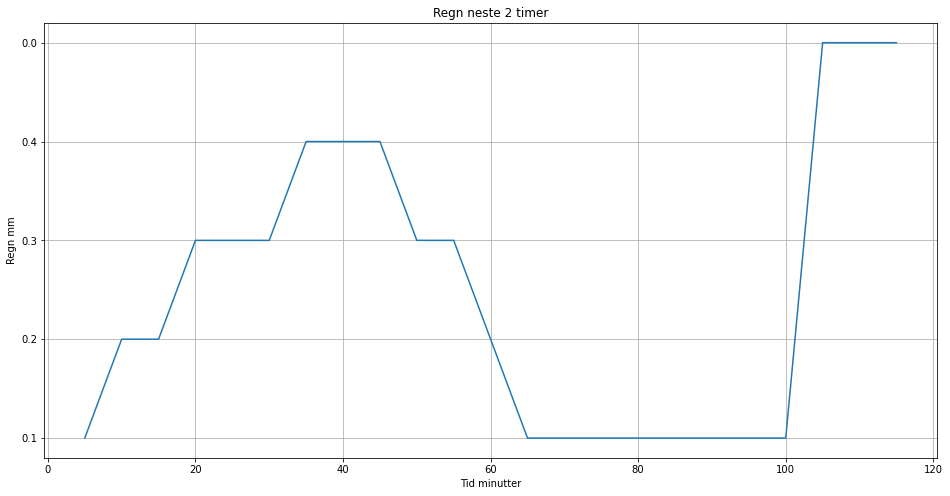

In [21]:
# Løsningsforslag 3
import requests
import matplotlib.pyplot as plt

url = 'https://api.met.no/weatherapi/nowcast/0.9/.json?lat=59.21672481296636&lon=9.598221739975772' # Åpne denne i Chrome for å se data

headers = {'User-Agent': 'Skogmo VG2DATa Agent 1.0', 'sitename': 'tom.oyvind.hogstad@gmail.com'}

response = requests.get(url, headers=headers)
json = response.json()

# Liste med X og Y verdier for graf
x_values = []
y_values = []
x = 5 # Veriene fra met.no er for hvert 5. minutt
for t in json['product']['time']:
    x_values.append(x)
    y_values.append(t['location']['precipitation']['value'])
    x += 5
    #print(t['to'], t['location']['precipitation']['value'], t['location']['altitude'])
    

plt.figure(figsize=(16,8)) # Størrelsen på grafikken
    
plt.plot(x_values, y_values) # Plotter x, y

# Alternativt som en bar graf
#plt.bar(x_values, y_values, 4) # Bar med stolpebredde 4


# Koden under beskriver hvordan koordinatsystemet skal se ut
plt.xlabel('Tid minutter') # Navn på x-akse
plt.ylabel('Regn mm') # Navn på y-akse
plt.title('Regn neste 2 timer') # Tittel på grafen

plt.grid(True) # Rutenett
plt.show() # Vis graf    
    
    

**Oppgaver:**<br>
*1. List ut verdiene for regn med tidspunkt.*<br>
*2. Hva er høyden over havet på koordinatet du har valgt - Hjemme eller på hytta?. (Er i datasettet)*<br>
*3. For de som ønsker. Det er et bibliotek som heter matplot lib for å skrive ut grafer. Eksempel i "04-moduler og bibliotere" notebooken. Det skal også være greit å søke på. Plott disse dataene. (Se også nedbør neste 90 minutter her https://www.yr.no/nb/v%C3%A6rvarsel/daglig-tabell/1-15183/Norge/Rogaland/Stavanger/Stavanger)*